In [334]:
#Arboles de desicion
#Para clasificar en dos posibles opciones

In [335]:
# Ejemplo con pasajeros del Titanic si sobrevivio o murio

In [336]:
import pandas as pd 

In [337]:
data = pd.read_csv('train.csv')

In [338]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [339]:
data.describe()
# Genera una descripción sobre los datos numericos los otros datos son ignorados

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

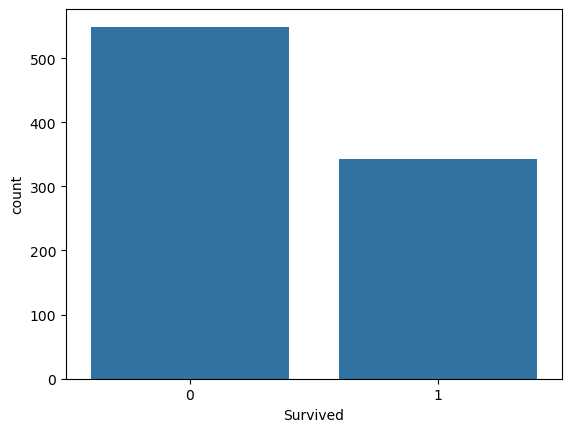

In [340]:
import seaborn as sb

sb.countplot(x='Survived', data= data)

<Axes: xlabel='Survived', ylabel='count'>

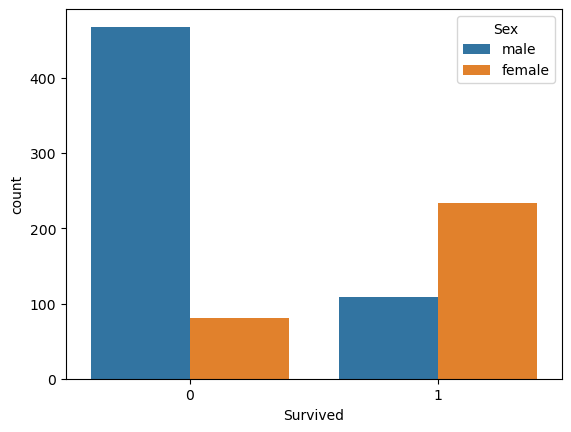

In [341]:
# Grafica que muestra los sobrevivientes, hue se usa para discriminarlos por sexo
sb.countplot(x='Survived', data= data, hue='Sex')
# Con esta grafica se puede determinar que el sexo si es una variable que podria determinar si una persona sobrevivia o no
# De la misma Forma Pclass 

In [342]:
data.isna().sum()
# isna para determinar los vacios y sum para sumrizarlos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

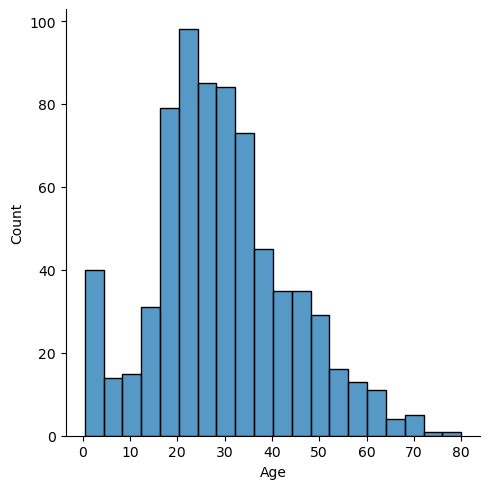

In [343]:
#Como el numero de datos sin edad son relativamente muchos, deben llenarse con un dato promedio para no eliminarlos 
# Y poder usar esa gran porción
# Como la cabina es un dato que no ayudaria mucho a entrenar nuestro modelo o no afectaria en teoria si una persona podria morir o no 
# Y debido a que son tantos registros vacios vamos a removerlos
# ... Igualmente el dato Embarked no dice mucho y solo son 2 registtros por lo que procederiamos a quitarlo.
sb.displot(x="Age", data =data)

In [344]:
#Vamos a ver como se hace el proceso para rellenar estos datos vacios

In [345]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [346]:
#Para ver el promedio 

In [347]:
data["Age"].mean()

29.69911764705882

In [348]:
# Con la siguiente sentencia vamos a rellenar los datos vacios con el promedio, 
# esta secuencia devuelve una nueva columna por lo que no es asignada aun. PAra hacerlo ejecutamos una asignación.

data["Age"].fillna(data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [349]:
#Asignacion 
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [350]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [351]:
# REctificamos 
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [352]:
# Y como podemos ver ya no hay datos NaN
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [353]:
# Ahora vamos a liminar la cabina, ya que esta no representa ningúna utilidad en nuestro estudio
# Para hacerlo vamos a usar la funcion drop y le especificamos el axis = 1 para indicar que es columna

data = data.drop(["Cabin"], axis=1)

In [354]:
# A este punto solo hay dos registros de la columna Embarked que no tienen valor
# El paso siguiente entonces seria remover ambos registros.

data = data.dropna()

In [355]:
# Volvamos a revisar la naturaleza de nuestros datos

In [356]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [357]:
# Vemos entonces que se hace necsario quitar las columnas: passengerId, Name, Ticket
# Para ello vamos a quitarlos todos de golpe escribiendo => (específicando que son columnas axis =1)
data = data.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [358]:
#Ahora vamos a convertir nuesta columna 'Sex' en una columna numerica para ello usarems la funcion  get_dummies
pd.get_dummies(data["Sex"])
# Como se puede ver siempre hay una relación entre los sexos (Si no es masculino es femenino
# Esta relación se llama en ingles multicolliniearity, puede encontrar relaciones donde no deberia haberlas o que son obvias.
# Lo cual nos puede generar un possible sobre entrenamiento, para estas situaciones usamos la propiedad drop_first
# Usamos la propiedad dtype para que nos sea devuelto en numerico y no en booleano


,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [359]:
pd.get_dummies(data["Sex"], drop_first = True, dtype=float)

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


In [360]:
# Llevamos los dummies a una columna y la asignamos al frame de datos y seguidamente borramos la columna 'Sex'
dummies_sex = pd.get_dummies(data["Sex"], drop_first = True, dtype=float)
data = data.join(dummies_sex)
data = data.drop(["Sex"], axis =1)

In [361]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.000000,1,0,7.2500,S,1.0
1,1,1,38.000000,1,0,71.2833,C,0.0
2,1,3,26.000000,0,0,7.9250,S,0.0
3,1,1,35.000000,1,0,53.1000,S,0.0
4,0,3,35.000000,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1.0
887,1,1,19.000000,0,0,30.0000,S,0.0
888,0,3,29.699118,1,2,23.4500,S,0.0
889,1,1,26.000000,0,0,30.0000,C,1.0


<Axes: xlabel='Survived', ylabel='count'>

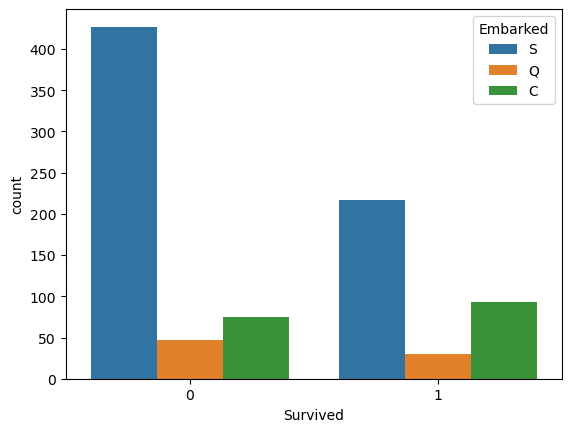

In [362]:
# Ahora va mos a revisar si la columna embarked is relevante o no
# PAra ellos vamos a hacer una grafica de los sobrevivientes y los colores  separandolos por embarked
sb.countplot(x="Survived", data=data, hue="Embarked")

In [363]:
# A Pesar que el grafico no esta balanceado vamos a realizar el mismo proceso usando los dummies.
embarked_dummies = pd.get_dummies(data["Embarked"], drop_first=True , dtype=float)
embarked_dummies

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,0.0,1.0
888,0.0,1.0
889,0.0,0.0


In [364]:
data = data.join(embarked_dummies)
data = data.drop(["Embarked"], axis=1)

In [365]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0


<Axes: >

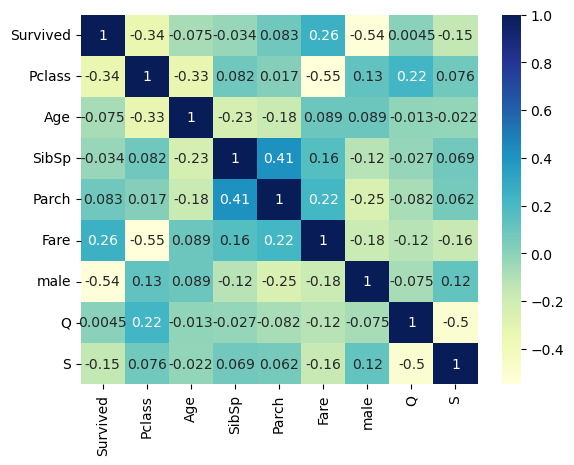

In [366]:
# Ahora un mapa de calor
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [367]:
# Podemos ver relacon positiva con Fare => Mientras mas Pagaron mas sobrevivieron
# Hay una corelacion negativa con male => Si eres hombre mas probabilídad tienes de haber muerto 
# Pclass igual 

<Axes: xlabel='Survived', ylabel='count'>

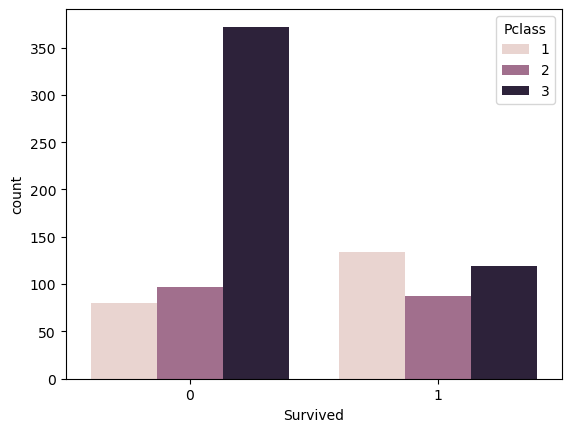

In [368]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [369]:
# Si puedes ver el grafico la mayoria de los que No sobrevivieron la mayoria era de 3ra clase. 

In [370]:
#Ahora vamos a empezar nuestro entrenamiento 
X = data.drop(["Survived"], axis=1) # Funcion indeterminada
y = data["Survived"] #Resultado de la funcion indeterminada

In [371]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [372]:
## Aca empieza la implementación del arbol de desicion

In [373]:
from sklearn.tree import DecisionTreeClassifier
#Esta libreria sirve entre otras cosas para clasificar (Sobrevivio o no) aunque puede ser usado para otras cosas

In [421]:
model = DecisionTreeClassifier(max_depth = 50)
#max_depth indica la profundidad del arbol. 
#Hay que tener en cuenta que esta profundidad  no puede ser muy grande por que puede sobre entrenarnos nuestro modelo
model.fit(X_ent, y_ent)
predictions = model.predict(X_pru)

In [427]:
from sklearn.metrics import accuracy_score
# Accuracy score los valores resultado verdaderos y las predicciones sacadas del modelo
accuracy_score(y_pru, predictions)


0.8033707865168539

In [435]:
# Como sabemos cual es una profundidad optima del arbol 
# entonces podriamos por medio de un ciclo o loop verificar cual es la profundidad que mejor resultados arroja.
results = []
for i in range(1,15): #diferntes profundidaades y guardamos la exactitud
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_ent, y_ent)
    predictions = model.predict(X_pru)
    accuracy = accuracy_score(y_pru, predictions)
    print(f"Result for {i}: {accuracy}")
    results.append(accuracy)

Result for 1: 0.8426966292134831
Result for 2: 0.8202247191011236
Result for 3: 0.8651685393258427
Result for 4: 0.8651685393258427
Result for 5: 0.8820224719101124
Result for 6: 0.8876404494382022
Result for 7: 0.8595505617977528
Result for 8: 0.8651685393258427
Result for 9: 0.8651685393258427
Result for 10: 0.8651685393258427
Result for 11: 0.8651685393258427
Result for 12: 0.8426966292134831
Result for 13: 0.8202247191011236
Result for 14: 0.8033707865168539


In [ ]:
# Puede que al ejecutarse el bloque varias veces puedas verificar que 
# los resultados son levemente distintos para cada iteraccion y esto se debe a que en macbine learning 
# los entrenamientos se realizan con datos aleatorios que se van a justando. por eso la exactitud puede variar

<Axes: >

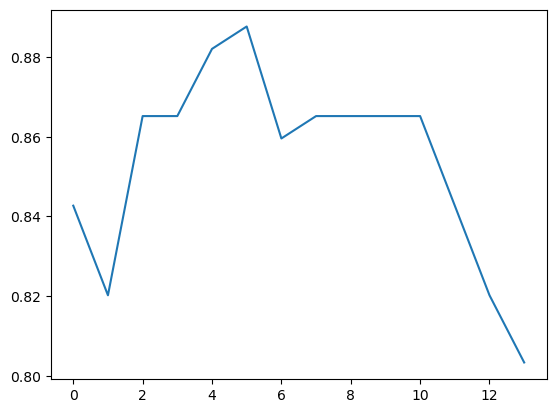

In [439]:
sb.lineplot(results)
# Podemoslo graficar para ver mejor los diferentes resultados 
# concluyendo que los valores entre 5 y 6 son los mas altos en exactitud.
# Adicionalmente podriamos jugar con otro parametro creando otro loop para cambiar 
# diferentes estrategias : Geny, entropia, ...
# estos lo llamamos hiperparametros 

In [ ]:
# podemos ver entonces reporte de clasificación 

In [441]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(X_ent, y_ent)
predictions = model.predict(X_pru)
accuracy = accuracy_score(y_pru, predictions)
results.append(accuracy)

In [443]:
from sklearn.metrics import classification_report
print(classification_report(y_pru, predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       123
           1       0.89      0.73      0.80        55

    accuracy                           0.89       178
   macro avg       0.89      0.84      0.86       178
weighted avg       0.89      0.89      0.88       178



In [449]:
#Ahora vamos a ver otra tecnica llamda confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predictions)
# Vamos a crear un Frame con mas información
pd.DataFrame(confusion_matrix(y_pru, predictions), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,118,5
Real: Si,15,40


In [ ]:
# Ahora, estos arboles de desicion podriamos graficarlos para ver el comportamiento 
# del de cada uno de los niveles 
# En problemas simples el arbol puede verse muy legible en problemas complejos no.

[Text(0.4226190476190476, 0.9285714285714286, 'male <= 0.5\n0.48\n711\n[426, 285]\nMurio'),
 Text(0.19642857142857142, 0.7857142857142857, 'Pclass <= 2.5\n0.387\n259\n[68, 191]\nVivio'),
 Text(0.30952380952380953, 0.8571428571428572, 'True  '),
 Text(0.09523809523809523, 0.6428571428571429, 'Fare <= 28.856\n0.107\n141\n[8, 133]\nVivio'),
 Text(0.06349206349206349, 0.5, 'Age <= 56.0\n0.203\n61\n[7, 54]\nVivio'),
 Text(0.047619047619047616, 0.35714285714285715, 'Fare <= 28.231\n0.18\n60\n[6, 54]\nVivio'),
 Text(0.031746031746031744, 0.21428571428571427, 'SibSp <= 0.5\n0.155\n59\n[5, 54]\nVivio'),
 Text(0.015873015873015872, 0.07142857142857142, '0.095\n40\n[2, 38]\nVivio'),
 Text(0.047619047619047616, 0.07142857142857142, '0.266\n19\n[3, 16]\nVivio'),
 Text(0.06349206349206349, 0.21428571428571427, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.07936507936507936, 0.35714285714285715, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.12698412698412698, 0.5, 'Parch <= 1.5\n0.025\n80\n[1, 79]\nVivio'),
 Text(0.11111111

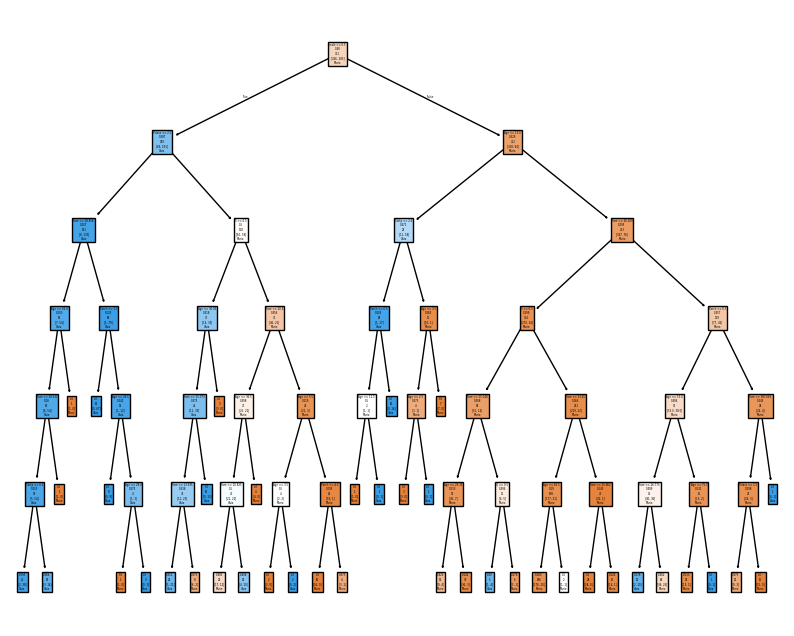

In [463]:
from sklearn.tree import plot_tree #Utileria de graficos
import matplotlib.pyplot as plt  #Librerias ppales para hacer graficos

plt.figure(figsize=(10,8)) #Tamanio de la figura
plot_tree(
    model, #El modelo
    feature_names=X_ent.columns, #Los nombres de las caracteristicas con la propiedad columns
    class_names=["Murio", "Vivio"], #Nombres con valores numericos ascendientes
    filled=True, #para llenar los recuadros
    label = "none" # PAra que no pinte datos dicionales y haga complicado la lectura
    
)

In [ ]:
#Los labels son muy pequenios para poder visualizarlos
# probemos con otros avlores del figure

[Text(0.4226190476190476, 0.9285714285714286, 'male <= 0.5\n0.48\n711\n[426, 285]\nMurio'),
 Text(0.19642857142857142, 0.7857142857142857, 'Pclass <= 2.5\n0.387\n259\n[68, 191]\nVivio'),
 Text(0.30952380952380953, 0.8571428571428572, 'True  '),
 Text(0.09523809523809523, 0.6428571428571429, 'Fare <= 28.856\n0.107\n141\n[8, 133]\nVivio'),
 Text(0.06349206349206349, 0.5, 'Age <= 56.0\n0.203\n61\n[7, 54]\nVivio'),
 Text(0.047619047619047616, 0.35714285714285715, 'Fare <= 28.231\n0.18\n60\n[6, 54]\nVivio'),
 Text(0.031746031746031744, 0.21428571428571427, 'SibSp <= 0.5\n0.155\n59\n[5, 54]\nVivio'),
 Text(0.015873015873015872, 0.07142857142857142, '0.095\n40\n[2, 38]\nVivio'),
 Text(0.047619047619047616, 0.07142857142857142, '0.266\n19\n[3, 16]\nVivio'),
 Text(0.06349206349206349, 0.21428571428571427, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.07936507936507936, 0.35714285714285715, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.12698412698412698, 0.5, 'Parch <= 1.5\n0.025\n80\n[1, 79]\nVivio'),
 Text(0.11111111

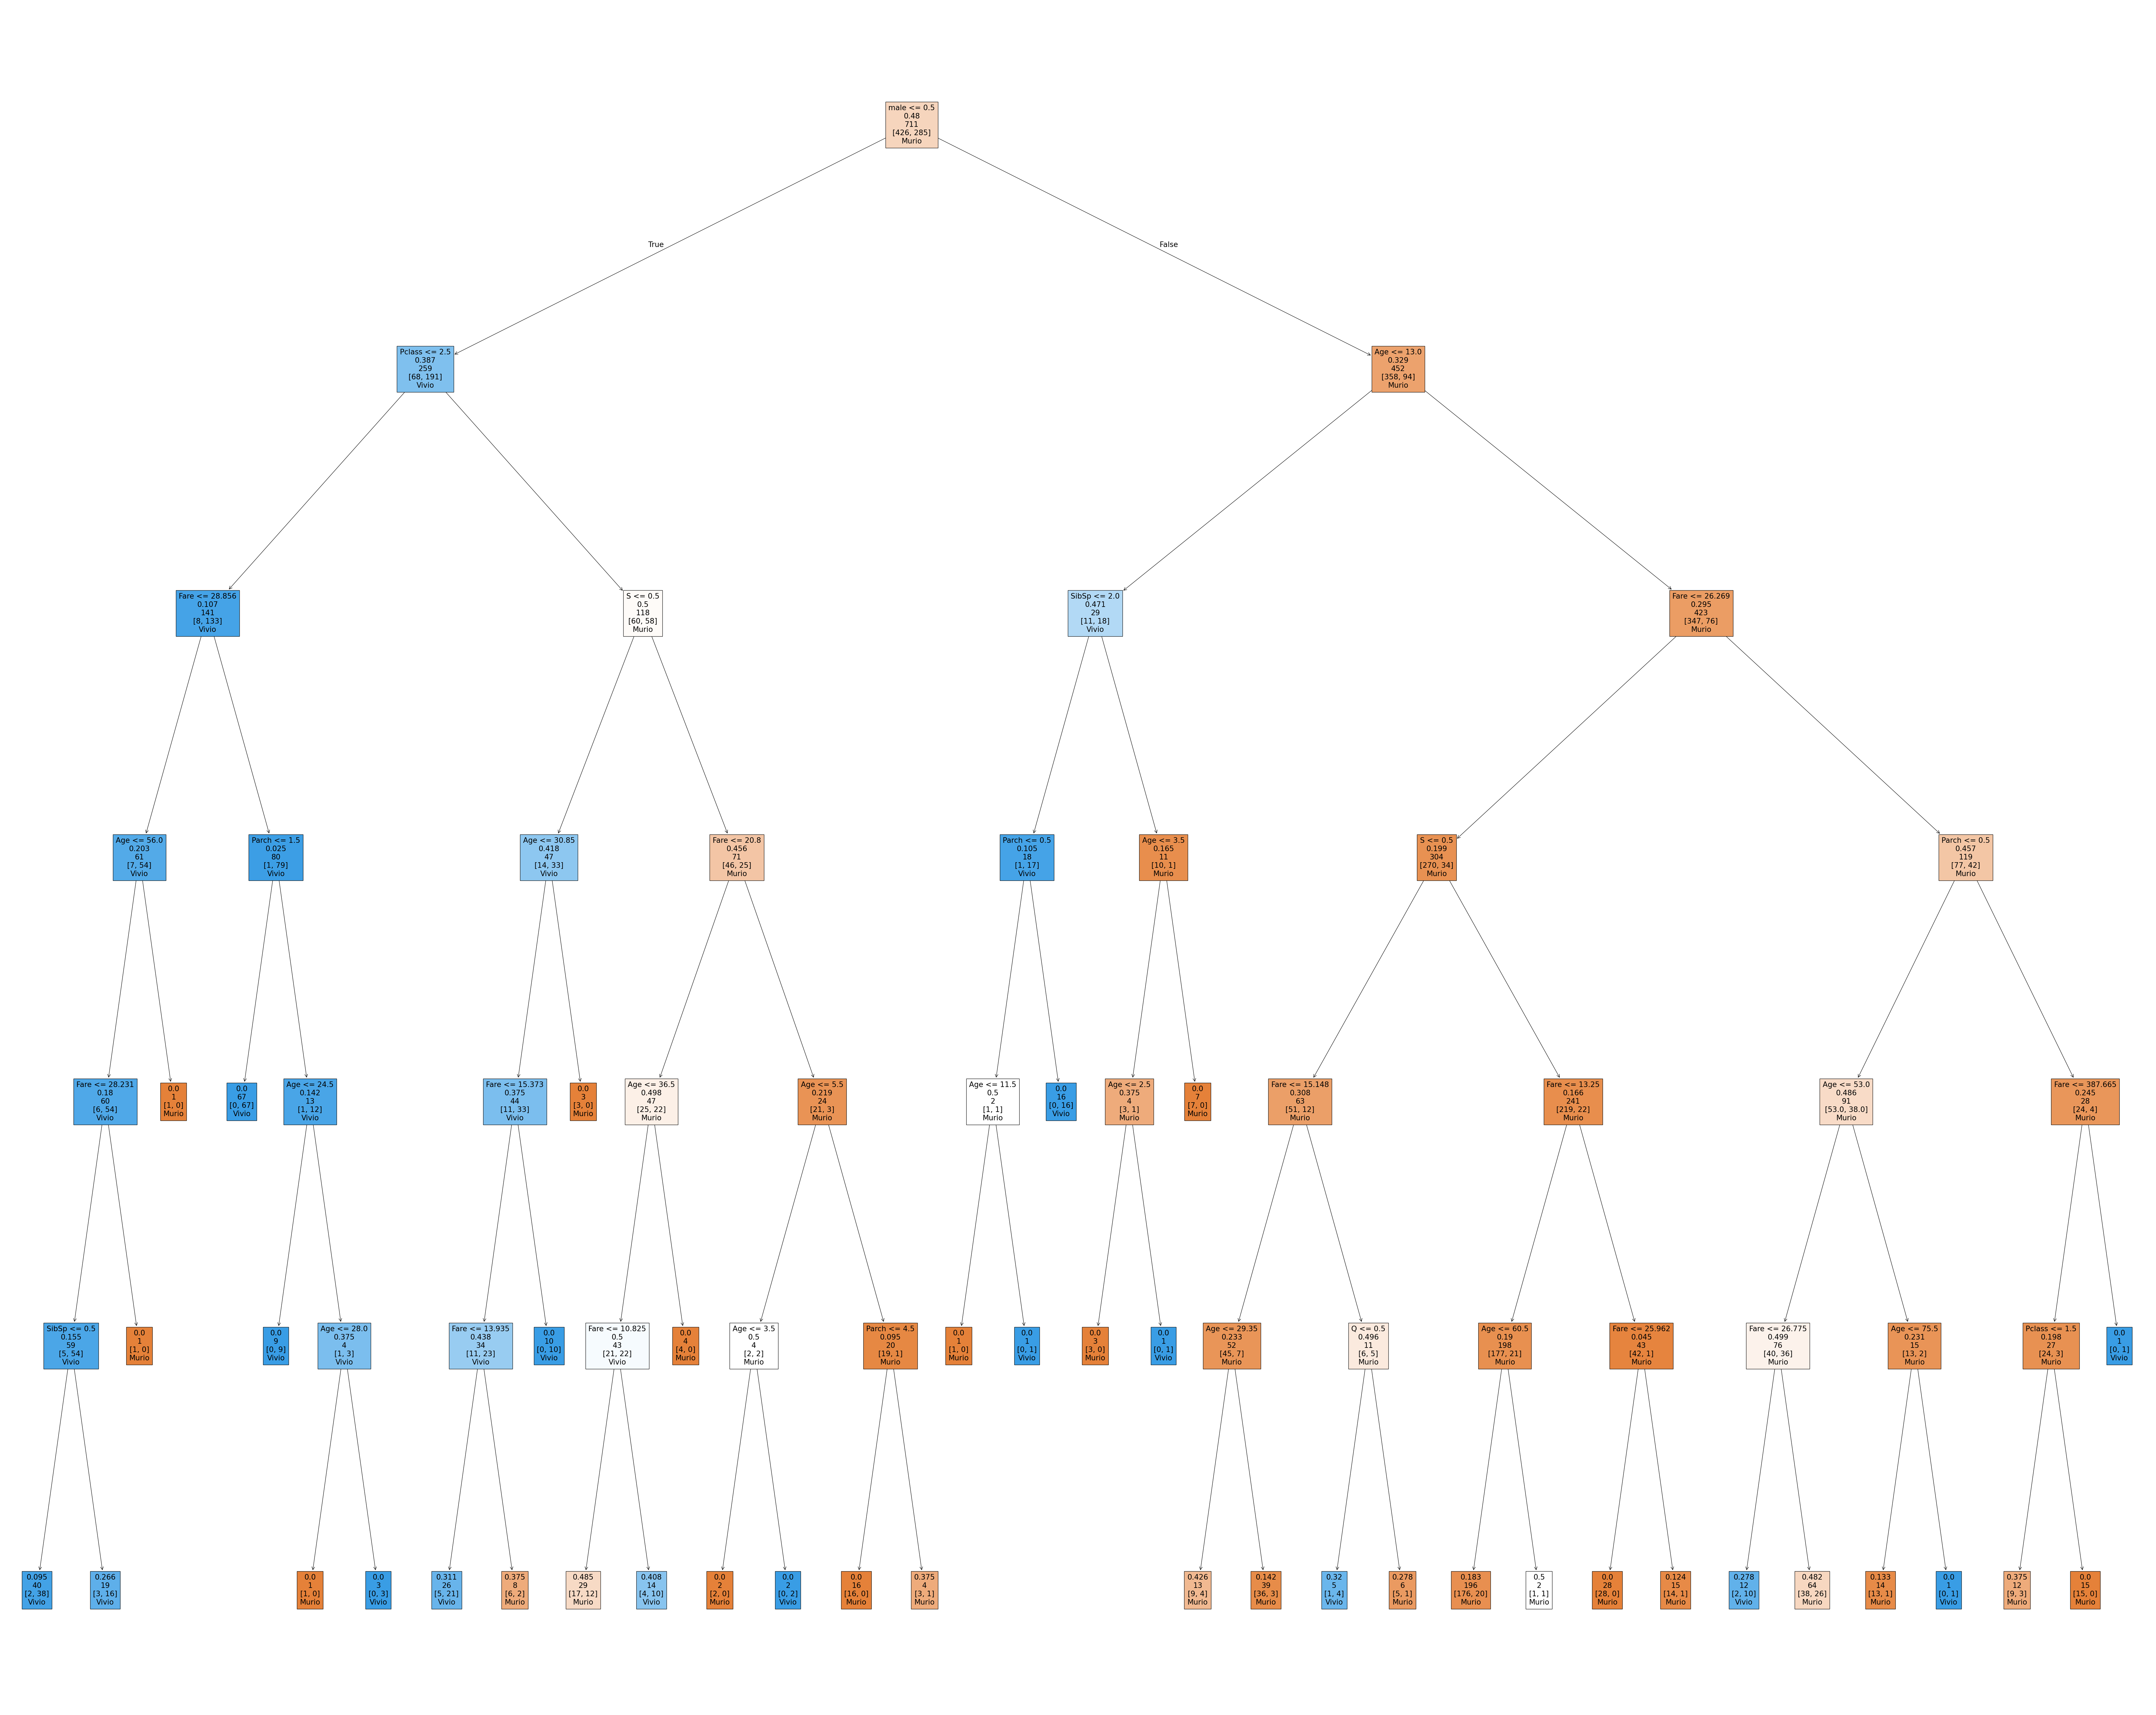

In [465]:
plt.figure(figsize=(100,80)) #Tamanio de la figura
plot_tree(
    model, #El modelo
    feature_names=X_ent.columns, #Los nombres de las caracteristicas con la propiedad columns
    class_names=["Murio", "Vivio"], #Nombres con valores numericos ascendientes
    filled=True, #para llenar los recuadros
    label = "none" # PAra que no pinte datos dicionales y haga complicado la lectura
    
)

In [467]:
# Viendo el arbol se puede evaluar las diferentes niveles y ver como el modelo esta tomadno desiciones.
# Los resultados son mejores que la desicion logistica


# Nota: Sabemos que nuestros datos no estan completamente balanceados es decir si el 50% sobrevivieron y 50%No
# Como la mayoria no  sobrevivieron la exactitud entonces es una metrica que puede estar mal. 
# Si siempre predigo que no sobrevive estaria bien la mayoria de las veces

# Por eso hay otras tecnicas para tratar de corregir esto

from sklearn.metrics import classification_report
print(classification_report(y_pru, predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       123
           1       0.89      0.73      0.80        55

    accuracy                           0.89       178
   macro avg       0.89      0.84      0.86       178
weighted avg       0.89      0.89      0.88       178



In [170]:
#Ahora vamos a ver otra tecnica llamda confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predictions)

array([[94, 13],
       [20, 51]])

In [174]:
# Vamos a crear un Frame con mas información
pd.DataFrame(confusion_matrix(y_pru, predictions), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,94,13
Real: Si,20,51


In [176]:
# La diagonal de esta matrix me dice el numero de aciertos del a prediccion. [94, 51]

In [189]:
# Ahora vamos a probar con un dato iventado, de prueba
new_person = [3 , 35, 0, 0, 10, 1, 0, 0] #Clase 3, edad = 35, viajando solo, hombre, precio = 10
person_predict = model.predict([new_person])
if person_predict[0] == 1:
    print("Sobrevivíste")
else:
    print("No Sobrevivíste")

No Sobrevivíste


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [191]:
# Ahora vamos a probar con un dato iventado, de prueba
new_person = [1 , 35, 0, 0, 80, 1, 0, 0] #Clase 1, edad = 35, viajando solo, hombre, precio = 80`
person_predict = model.predict([new_person])
if person_predict[0] == 1:
    print("Sobrevivíste")
else:
    print("No Sobrevivíste")

Sobrevivíste


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
